<h1 align=center><font size = 5>Linear Regression </h1 >

### References:
    [1] Redes Neuronales y Sistemas Borrosos. 3ª Edición (Spanish Edition). Bonifacio Martín del Brío, Alfredo Sanz Molina. RA-MA S.A. Editorial y Publicaciones, 28 nov. 
    
In this notebook we used the next Python libraries:

In [8]:
import cmath
import numpy as np
import torch as th
import tensorflow as tf

import matplotlib.pyplot as plt

### Functions Implemented
One of the important functions implemented is the <code>DMoon_dataset</code>. This function generates a dataset known as the **Double Moon Problem** referenced in []

In [4]:
def DMoon_dataset(dataSize=5000, d=-5):
  # Initial Parameters and Variables for moons
  dataSize = dataSize;                     # Size of total input data
  archW = 7
  w1 = 10
  k = 10
  r1 = 10
  d = d                              # Rings Deep  
  # Generating moons
  x1 = ( (-13) + (13-(-13)) * np.random.rand(1,int(dataSize/2)));
  x1 = x1[0,:]
  x2 = ( (-3) + (23-(-3)) * np.random.rand(1,int(dataSize/2)));
  x2 = x2[0,:]

  y1 = np.zeros(int(dataSize/2))
  y2 = np.zeros(int(dataSize/2))

  for i in range(int(dataSize/2)):
      e=((0)+(archW-(0))*np.random.rand(1,1))
      y1[i] = np.real( (cmath.sqrt(((e[0,0]*0.5)+w1)**2 -x1[i]**2)) )
      e=((0)+(archW-(0))*np.random.rand(1,1))
      y2[i] = np.real(-(d + cmath.sqrt( ((e[0,0]*0.5)+r1)**2 -(x2[i]-k)**2) ))
  # Input vector
  xx = np.concatenate([x1,x2])
  yy = np.concatenate([y1,y2])

  X = np.asarray([xx,yy])
  X = X.transpose()
  # Target Vector (output)
  t1 = np.ones(int(dataSize/2))
  t2 = np.zeros(int(dataSize/2))
  #t2 = -1 * np.ones(int(dataSize/2))
  T = np.array(np.concatenate([t1,t2]))
  
  return X,T

We can visualize & generate data with the Double Moon dataset as follow:

Text(0, 0.5, 'x2')

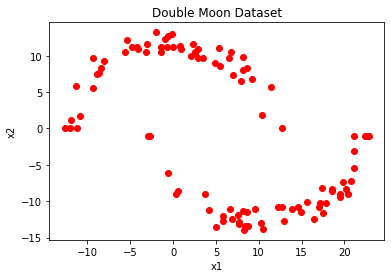

In [12]:
# Generating data
X, Y = DMoon_dataset(dataSize = 100, d = 1)
# Data Visualization
plt.plot(X[:,0], X[:,1], 'ro')
plt.title('Double Moon Dataset')
plt.xlabel('x1')
plt.ylabel('x2')

## Introduction
Linear regression models or linear classifiers are models used to correlate/transform an input into an output. This transformation gets done through a linear equation of the form:

$Linear \ equation :y=mx+b$

In Machine Learning terminology, the slope 'm' is designated with the letter 'w' of weight. So let's make this linear equation in a python function:

In [14]:
# defining the linear equation
def l_eq(x):
    w, b = 2,1
    y = (w*x) + b
    return y

# example using one input
x = 1
print('model output to one input:', l_eq(x))
# example using multiple inputs
x = np.array([1,2])
print('model output to multiple inputs:', l_eq(x))

model output to one input: 3
model output to multiple inputs: [3 5]


In the beginning the model don't know how to do this input-output mapping. The idea is that we can train the model so it can learn the correlation. Internally, what this training means is finding the best parameter 'w'. In the next example we can observe this better

### Example 1

In the next example, we trained a model that learnt how to transform an input vector 'x' into a vector 'y'. We assumed in this example that initialy, w = 10 and b=0:

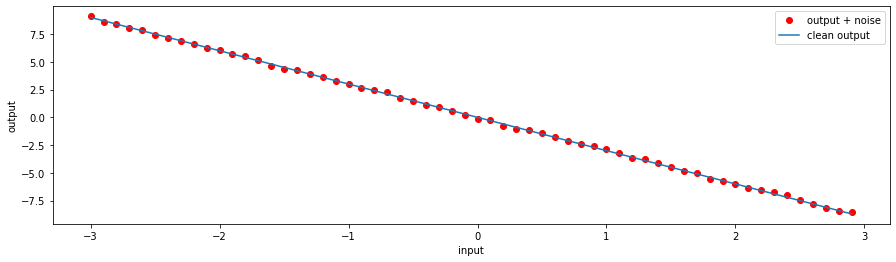

In [36]:
# defining the linear equation
def l_eq(x):
    w, b = -10,0
    y = (w*x) + b
    return y

# Generating the input
X = (np.arange(-3,3,0.1)) # This should be row vector, but because of the next visualization is leave it like this
# Generating the output
f = -3*X
# Adding noise
Y = f+0.1*np.random.randn(len(X))


plt.figure(figsize=(15,4))
plt.plot(X, Y, 'ro', label='output + noise');
plt.plot(X, f, label='clean output');
plt.xlabel('input')
plt.ylabel('output')
plt.legend();

If we give our input vector 'X' to the model **before training**, we can show how in the beginning the model does not know how to map the input 'X' to our 'Y' output.

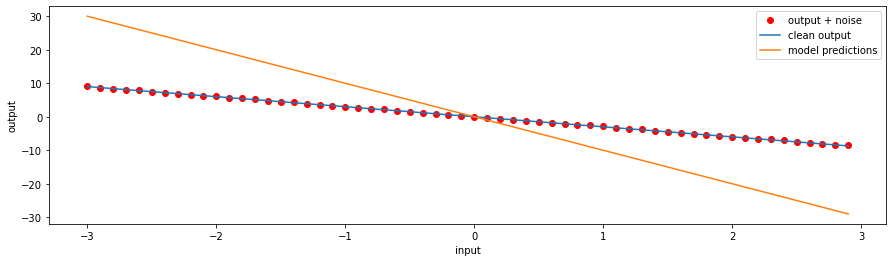

In [38]:
# Appliying the input to our model
Y_pred = l_eq(X)
# Model visualizations
plt.figure(figsize=(15,4))
plt.plot(X, Y, 'ro', label='output + noise');
plt.plot(X, f, label='clean output');
plt.plot(X,Y_pred, label='model predictions')
plt.xlabel('input')
plt.ylabel('output')
plt.legend();

## Model Learning
As mentioned before, the way that our model will learn is by finding the parameter 'w' that best correlate the input-output pairs as a whole. This method consist in propose an **error function or cost** that measure the current model performance and try to minimize this function. This allows the model to adjust its parameters ('w' in this case) iteratively through an **optimization function**.

In summary, to achieve this learning process, we need to define: 

1. An **error function** to measure the model performance. This error is usually the well known as Mean Square Error (MSE). But there are others such as the Root Mean Square Error (RMSE):

$$E = MSE =\frac{1}{n} * \sum_{i=1}^n (ypred_i - y_i)^2$$

Where

$$y_i = W X+b$$

2. An **optimization rule** to update the model parameters until its output tends to be as desired. One optimization rule that illustrate the usual way of obtaining learning algorithms is known as the rule of Widrow-Hoff or Least Mean Squares (LMS)[1]:

$$W_(t+1) = W_t- lr * \delta E(W)$$

Where

$$\delta E(W)= \sum $$


To compute the gradient of E(W) we will use a torch tensor from the library PyTorch. We need to take into account that as only 'w' is the parameter that needs to be derivate, it is the only one that needs to be a pytorch tensor with <code>requires_grad=True</code>.

In [ ]:
# MSE error function 
def MSE_err_f(y_pre, y):
    err = np.mean((y_pre-y)**2)
    return err
# Creating Tensor from PyTorch
w = th.tensor(-10, requires_grad = True)